## Optimal time for intraday trading.

Our goal is to find the best time to trade a stock to maximize profit at the end of 2 days.

Following assumptions are set for the solution provided here:


*   This is intraday trading, i.e. we sell all the stocks bought on the same day.
*   There can be only 1 trade in a day, i.e. 1 buy and 1 sell operation.
*   Stocks cannot be bought and sold at the same minute of the day.
*   We buy at low and sell at high price values.



In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %cd drive/MyDrive/COLAB

/content/drive/MyDrive/COLAB




---


We import necessary libraries to handle stocks data.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



---


Dataset file: 'stock_dataset_1.json'

We load the json file to a dataframe and check total number of rows and view first few rows.

In [22]:
stocks=pd.read_json('stock_dataset_1.json')
print(len(stocks))
stocks.head()

747


,datetime,open,high,low,close,volume
0,2021-02-04 09:15:00+05:30,1307.00,1307.00,1298.80,1299.05,134
1,2021-02-04 09:16:00+05:30,1299.05,1301.00,1299.05,1300.95,284
2,2021-02-04 09:17:00+05:30,1300.95,1301.00,1298.80,1298.80,188
3,2021-02-04 09:18:00+05:30,1298.80,1298.80,1287.00,1287.00,321
4,2021-02-04 09:19:00+05:30,1287.00,1294.45,1287.00,1290.70,48




---


There are rows where no trade is done, i.e. volume of stock = 0.

We drop such rows as we cannot buy or sell stocks at that time and count the remaining number of rows.

In [23]:
stocks.drop(stocks[stocks.volume == 0].index,inplace=True)
print(len(stocks))

557




---


We have to do intraday trading, so we separate the stocks data according to days.

Since we have only 2 days worth of data, we manually separate the data using specific date filter. If we do not know the number of different days, then we create new dataframe whenever we encounter different date than previous one.

In [24]:
Day1=stocks[stocks['datetime'].dt.day==4]
Day1.reset_index(inplace=True)
print(len(Day1))
Day2=stocks[stocks['datetime'].dt.day==5]
Day2.reset_index(inplace=True)
print(len(Day2))

300
257




---


We visualize the high and low prices of stock on day 1 and day 2.

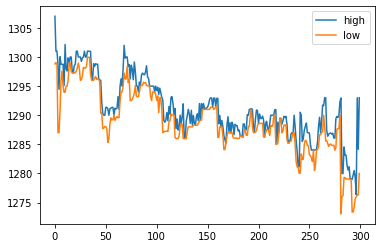

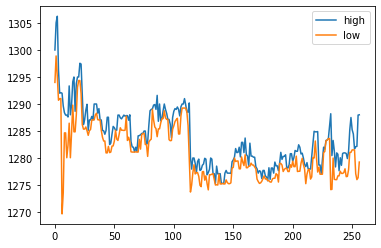

In [25]:
plt.plot(Day1['high'])
plt.plot(Day1['low'])
plt.legend(['high','low'])
plt.show()

plt.plot(Day2['high'])
plt.plot(Day2['low'])
plt.legend(['high','low'])
plt.show()



---


Function to get the best time for buying and selling stock in a day.

We buy the stocks at low and sell at high, provided there are enough volume of stocks available during selling time.

We update buy and sell time everytime we encounter a better profit value.

Profit = (Sell_Price-Buy_Price)*Volume

The function returns following:



*   Buying Time
*   Selling Time
*   Profit
*   Volume

Time complexity: O(N^2) ; where N is number of rows in dataset

Space complexity: O(1)




In [26]:
def gettradetime(stockinfo):
  curr_profit=-1
  buy=None
  sell=None
  volume=None
  for i in range(len(stockinfo)):
      for j in range(i+1,len(stockinfo)):
        if stockinfo.loc[j,'volume'] >= stockinfo.loc[i,'volume']:
          profit=(stockinfo.loc[j,'high']-stockinfo.loc[i,'low'])*stockinfo.loc[i,'volume']
          
          if profit>curr_profit:
            # print(profit,curr_profit)
            volume=stockinfo.loc[i,'volume']
            curr_profit=profit
            buy=stockinfo.loc[i,'datetime']
            sell=stockinfo.loc[j,'datetime']
  return {'buy':buy,'sell':sell,'profit':curr_profit,'volume':volume}


Function to print the output in proper format.

In [27]:
def printstock(data):
  print('Date: ',data['buy'].day,'-',data['buy'].month,'-',data['buy'].year)
  print('Buying time: ',data['buy'].hour,':',data['buy'].minute)
  print('Selling time: ',data['sell'].hour,':',data['sell'].minute)
  print('Number of stocks traded: ',data['volume'])
  print('Profit on trade: ',data['profit'])



---


day1trade contains optimal time for Day1 

day2trade contains optimal time for Day2

Finally we print the profit at the end of 2 days.

In [28]:
day1trade=gettradetime(Day1)
printstock(day1trade)
print("")
day2trade=gettradetime(Day2)
printstock(day2trade)
print("")
print("Profit at end of 2 days: ",day1trade['profit']+day2trade['profit'])

Date:  4 - 2 - 2021
Buying time:  14 : 23
Selling time:  14 : 56
Number of stocks traded:  497
Profit on trade:  6461.0

Date:  5 - 2 - 2021
Buying time:  9 : 21
Selling time:  9 : 38
Number of stocks traded:  1095
Profit on trade:  30386.25

Profit at end of 2 days:  36847.25
